## Fokker-Planck Shooter
For convenience the key equations are given below from https://arxiv.org/pdf/astro-ph/9407016.pdf:

1) Fokker-Planck equation
$$    \frac{\partial P(\varphi,t)}{\partial t} = \frac{1}{3H}\frac{\partial}{\partial \varphi}\left(V'(\varphi) P(\varphi,t)\right) + \frac{H^3}{8\pi^2}\frac{\partial^2 P(\varphi,t)}{\partial \varphi^2} $$

2) Schrodinger-like equation
$$     -\frac{1}{2}\frac{\partial^2 \Phi_n(\varphi)}{\partial \varphi^2} + W(\varphi) \Phi_n (\varphi) = \frac{4\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

3) Effective potential
$$ W(\varphi) = \frac{1}{2}\left[v'(\varphi)^2-v''(\varphi)\right], \> \> v(\varphi) = \frac{4\pi^2}{3H^4} V(\varphi) $$

4) Solutions take the form
$$ P(\varphi,t) = \exp\left(-\frac{4\pi^2 V(\varphi)}{3H^4}\right) \sum^{\infty}_{n=0} a_n \Phi_n (\varphi) e^{-\Lambda_n (t-t_0)} $$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

### Defining key parameters

In [2]:
# Hubble rate
H = 1
# Effective mass
m = 1
M = m**2

### Quadratic potential
Here we define a potential 
$$ V(\varphi) = \frac{1}{2} m^2 \varphi^2, $$
with effective potential
$$ W(\varphi) = m^2\frac{2\pi^2}{3H^4}\left[\frac{4\pi^2}{3H^4} m^2 \varphi^2 - 1\right] $$
The eigenvalues have been determined in https://arxiv.org/pdf/1904.11917.pdf for the free limit to be
$$ \Lambda_n = \frac{n}{3}\frac{m^2}{H} $$

In [3]:
# Field 
phi = np.linspace(0,10,30000)

# Effective potential
def W_pot(phi):
    '''Defines the effective potential in the SL equation
    phi: Field value'''
    
    W = M*((2*np.pi**2)/(3*H*H*H*H))*(((4*np.pi**2)/(3*H*H*H*H))*M*phi**2 - 1)
    return W

Below we rewrite the SL equation as a coupled system of ODEs which we then use the ``odeint`` function to integrate.
$$ \frac{\partial \Phi_n(\varphi)}{\partial \varphi} = Y $$
$$     \frac{\partial Y}{\partial \varphi} = 2 W(\varphi) \Phi_n (\varphi) - \frac{8\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

In [4]:
# Schrodinger-like coupled ODEs
def SL_dphi(V,phi):
    '''Computes the second derivative of the SL equation
    V: array where first entry is the eigenfunction, second is Y
    as defined above
    phi: field values'''
    
    # Empty array for derivatives
    dV = np.zeros(2)
    
    # Computes derivatives
    dV[0] = V[1]
    dV[1] = V[0]*(2*W_pot(phi) - (8*np.pi*q*np.pi**2)/(H**3))
    return dV

We start with $n=0$ for the eigenvalue. We also create two arrays ``V_even`` and ``V_odd`` which serve as the starting conditions for even and odd $\Phi_n$, respectively.

In [5]:
# Eigenvalue
def quad_eig(n):
    '''Computes the eigenvalue for the quadratic case for a given n
    n: eigenfunction label'''
    
    # Eigenvalue
    q = (n/3)*(M/H)
    return q

q = quad_eig(0)

# Starting conditions for the even and odd functions
V_even = np.array([1,0])
V_odd = np.array([0,1])

# Integrates SL equation
V_0 = odeint(SL_dphi,V_even,phi)

Now lets change $n$ slightly so we undershoot and overshoot.

In [6]:
# Changing n
q = quad_eig(0.1)
# Integrates SL equation
V_0p = odeint(SL_dphi,V_even,phi)

# Changing n
q = quad_eig(-0.1)
# Integrates SL equation
V_0m = odeint(SL_dphi,V_even,phi)

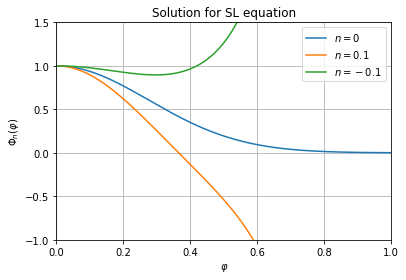

In [7]:
# Plotting
plt.grid()
plt.ylim(-1,1.5)
plt.xlim(0,1)
plt.title("Solution for SL equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(phi,V_0[:,0],label="$n=0$")
plt.plot(phi,V_0p[:,0],label="$n=0.1$")
plt.plot(phi,V_0m[:,0],label="$n=-0.1$")
plt.legend()

Let us now try the next eigenvalue with $n=1$ and an odd initial condition.

In [8]:
# Changing n
q = quad_eig(0.95)
# Integrates SL equation
V_1 = odeint(SL_dphi,V_odd,phi)

# Changing n
q = quad_eig(1.2)
# Integrates SL equation
V_1p = odeint(SL_dphi,V_odd,phi)

# Changing n
q = quad_eig(0.9)
# Integrates SL equation
V_1m = odeint(SL_dphi,V_odd,phi)

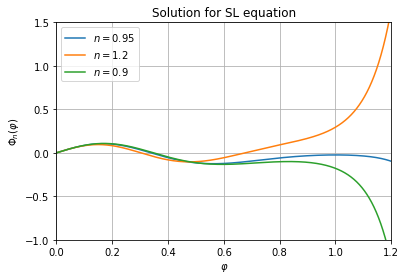

In [9]:
# Plotting
plt.grid()
plt.ylim(-1,1.5)
plt.xlim(0,1.2)
plt.title("Solution for SL equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(phi,V_1[:,0],label="$n=0.95$")
plt.plot(phi,V_1p[:,0],label="$n=1.2$")
plt.plot(phi,V_1m[:,0],label="$n=0.9$")
plt.legend()

Now for $n=2$. 

In [10]:
# Changing n
q = quad_eig(1.90985)
# Integrates SL equation
V_2 = odeint(SL_dphi,V_even,phi)

# Changing n
q = quad_eig(2)
# Integrates SL equation
V_1p = odeint(SL_dphi,V_even,phi)

# Changing n
q = quad_eig(1.9)
# Integrates SL equation
V_1m = odeint(SL_dphi,V_even,phi)

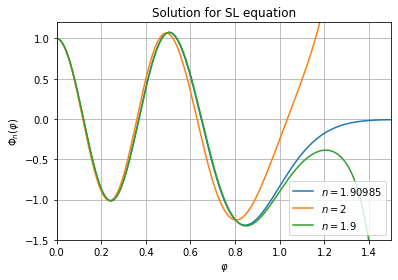

In [11]:
# Plotting
plt.grid()
plt.ylim(-1.5,1.2)
plt.xlim(0,1.5)
plt.title("Solution for SL equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(phi,V_2[:,0],label="$n=1.90985$")
plt.plot(phi,V_1p[:,0],label="$n=2$")
plt.plot(phi,V_1m[:,0],label="$n=1.9$")
plt.legend()